In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

import warnings
warnings.filterwarnings('ignore')

## [DSO] Machine Learning Seminar Vol.6
2020-06-xx  
SKUE

In [2]:
Image(url="https://image.yodobashi.com/product/100/000/009/002/935/105/100000009002935105_10204.jpg")

# アンサンブル学習~異なるモデルの組み合わせ
+ 多数決に基づく予測
+ バギング
+ ブースティング

## アンサンブルによる学習
+ 様々な分類器を1つのメタ分類器として組み合わせる
+ 多数決の原理
 + 分類器の過半数によって予測されているクラスが選択される。
  + 多クラスの分類問題に一般化するには相対多数決となる。

In [3]:
Image(url='https://www.karlsims.com/scv-abcde.gif')

In [4]:
Image(url='https://miro.medium.com/max/1700/0*PBGJw23ud8Sp7qO4.')

\\( C_j \\)は予測されたクラスラベルを表す。

最頻値
$$ \hat y = mode \left \{ C_1(x), C_2(x), C, \dots , C_m(x) \right \} $$

二値分類タスクでの多数決予測
$$C(x) = sign \left [ \sum_j^m C_j(x)  \right] = \begin{cases}
    1 \  \left ( \sum_j^m C_j(x) \geq 0 \right)  \\
    -1 \  \left ( \sum_j^m C_j(x) < 0 \right)
  \end{cases}$$

+ アンサンブル法の有用性を示す例
 + 二値分類を考える
 + 二値分類のn個の分類器それぞれの誤分類率（ \\( \epsilon \\) ）が全て等しいとする。
 + それぞれの分類器が独立しており、誤分類率に相関がないものとする。
 
アンサンブルの誤分類率を二項分布の確率質量変数として表すと、
$$P( y \geq k ) = \sum_k^n {}_n C _k \epsilon^k (1-0.25)^{n-k} = \epsilon_{ensemble} $$
誤分類率が0.25の分類器の数が11個で、そのうち6個の分類器を選ぶ場合、
$$P( y \geq k ) = \sum_{k=6}^{11} {}_{11} C _k 0.25^k (1-0.25)^{11-k} = 0.034 $$

In [5]:
from scipy.special import comb # miscからspecialに変わっている。
import math

# アンサンブルによる誤差を計算するための関数
def ensemble_error(n_classifier, error):
    k_start = int(math.ceil(n_classifier / 2.))
    # 数式と同じ処理を内包表記で書いている。
    probs = [comb(n_classifier, k) * error**k * (1-error)**(n_classifier - k) for k in range(k_start, n_classifier + 1)]
    return sum(probs)

ensemble_error(n_classifier=11, error=0.25)

0.03432750701904297

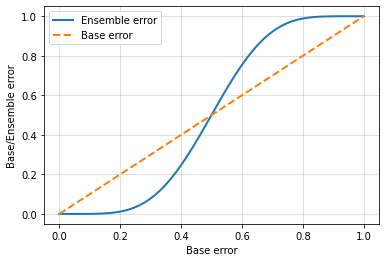

In [6]:
import numpy as np
import matplotlib.pyplot as plt

error_range = np.arange(0.0, 1.01, 0.01)
ens_errors = [ensemble_error(n_classifier=11, error=error) for error in error_range]

plt.plot(error_range, ens_errors,
                label='Ensemble error', linewidth=2)
plt.plot(error_range, error_range,
                linestyle='--', label='Base error', linewidth=2)
plt.xlabel('Base error')
plt.ylabel('Base/Ensemble error')
plt.legend(loc='upper left')
plt.grid(alpha=0.5)
plt.show()

## 多数決による分類器の結合

### 単純な多数決分類器を実装する

\\( C_j \\)は予測されたクラスラベルを表す。  
\\( \chi_A \\)は特性関数を表す。

最大値を与える引数についての式で予測を行う。
$$ \hat y = \arg \max_i \sum_{j=1}^m w_j \chi_A \left ( C_j(x) = i \right ) $$
それぞれの分類器の重みが等しい場合、以下のようになる。
$$ \hat y = mode \left \{ C_1(x), C_2(x), C, \dots , C_m(x) \right \} $$

+ 例
 + 3つのベース分類器からなるアンサンブルを考える。
 $$C_1(x) \rightarrow 0, C_2(x) \rightarrow 0, C_3(x) \rightarrow 1 $$
 
 $$\hat y = mode \left \{ 0, 0, 1 \right \} = 0 $$
 
 ここで、\\( C_3 \\)の重み係数を0.6、\\( C_1 \\)と\\( C_2 \\)の重み係数を0.2にしてみよう。
$$ \hat y = \arg \max_i \sum_{j=1}^3 w_j \chi_A \left ( C_j(x) = i \right ) \\
= \arg \max_i \left [ 0.2 \times \chi_A \left ( C_1(x) = i \right ) + 0.2 \times \chi_A \left ( C_2(x) = i \right ) + 0.6 \times \chi_A \left ( C_3(x) = i \right )  \right ] = 1
$$
行われていることは以下と同じである。
 $$\hat y = mode \left \{ 0, 0, 1, 1, 1 \right \} = 1 $$

In [7]:
import numpy as np

np.argmax(np.bincount([0, 0, 1], weights=[0.2, 0.2, 0.6]))

1

+ クラスラベルの確率から予測するように多数決を修正する
 + \\( p_{ij} \\)はクラスラベルiに対してj番目の分類器が予測した確率を表す。

$$\hat y = \arg \max_i \sum_{j=1}^m w_jp_{ij}$$

$$ C_1(x) \rightarrow [0.9, 0.1], C_2(x) \rightarrow [0.8, 0.2], C_3(x) \rightarrow [0.4, 0.6] $$

$$p( i = 0 | x) = 0.2 \times 0.9 + 0.2 \times 0.8 + 0.6\times 0.4 = 0.58 \\
p( i = 1 | x) = 0.2 \times0.1 + 0.2 \times 0.2 + 0.6\times 0.6 = 0.42
$$ 

$$ \hat y = \arg max_i [p( i = 0 | x) , p( i = 1 | x)] = 0 $$

In [8]:
ex = np.array([[0.9, 0.1],
                          [0.8, 0.2],
                          [0.4, 0.6]])

p = np.average(ex, axis=0, weights=[0.2, 0.2, 0.6])

display(p)
display(np.argmax(p))

array([0.58, 0.42])

0

In [50]:
# 多数決投票分類器のクラスの作成

from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder

# module間で干渉があるので、以下の処理を挟む
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator

class MajorityVoteClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, classifiers, vote='classlabel', weights=None):
        self.classifiers = classifiers
        # dict形式でkey-valueのデータを保持する
        self.named_classifiers = {key: value for key, value in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights
        
    def fit(self, X, y):
        # LabelEncoderを使ってクラスラベルが0から始まるようにエンコードする
        # self.predictのnp.argmax呼び出しで重要となる
        self.lablenc_ = LabelEncoder() # sklearnを01になおす関数
        self.lablenc_.fit(y) # sklearnのfit
        self.classes_  = self.lablenc_.classes_ # selfにエンコードした結果をクラスとして持たせる
        self.classifiers_ = []
        for clf in self.classifiers:
            # ラベルを変換して学習している
            # cloneは同じパラメータを使って学習する際に使う。
            # Constructs a new estimator with the same parameters.
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            # 学習した分類器をappendで格納する
            self.classifiers_.append(fitted_clf)
        return self
    
    def predict(self, X):
        # 確率になっている場合
        if self.vote == 'probability':
            # arg maxで確率が最大になるXを選ぶ
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
            
        # classlabelでの多数決
        else:
            # clf.predict呼び出しの結果をarray形式で蓄積する
            # np.asarray: Convert the input to an array.
            predictions = np.asarray([clf.predict(X) for clf in self.classifiers_]).T
            
            # np.apply_along_axis : Apply a function to 1-D slices along the given axis.
            maj_vote = np.apply_along_axis(
                                                                      lambda x:
                                                                            # Count number of occurrences of each value in array of non-negative ints.
                                                                            np.argmax(np.bincount(x, weights=self.weights)),
                                                                            axis=1, # Axis along which arr is sliced.
                                                                            arr=predictions # Input array
                                                                    )
            
        # 各サンプルに確率の最大値を与えるクラスラベルを抽出
        # inverse_transform : Transform labels back to original encoding.
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote
    
    def predict_proba(self, X):
        # 分類器ごとにsklearnの予測結果をarray形式で蓄積
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers_ ])
        # 加重平均をとる
        # np.average : Compute the weighted average along the specified axis.
        # axis : Axis or axes along which to average a. 
        # weights : An array of weights associated with the values in a. Each value in a contributes to the average according to its associated weight.
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba
    
    def get_params(self, deep=True):
        """GridSearchの実行時に分類器のパラメータ名を取得"""
        if not deep:
            # 単継承のクラス階層構造で super は名前を明示することなく親クラスを参照するのに使え、それゆえコードをメンテナンスしやすくなります。
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            # six.iteritems : Returns an iterator over dictionary’s items. 
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
                return out

### 多数決の原理に基づいて予測を行う

In [51]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
iris = datasets.load_iris()
X, y = iris.data[50:, [1, 2]], iris.target[50:]
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import numpy as np

clf1 = LogisticRegression(penalty='l2',
                                             C=0.001,
                                             random_state=1)

clf2 = DecisionTreeClassifier(max_depth=1,
                                             criterion='entropy',
                                             random_state=0)

clf3 = KNeighborsClassifier(n_neighbors=1,
                                                p=2,
                                                metric='minkowski')

pipe1 = Pipeline([['sc', StandardScaler()], ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()], ['clf', clf3]])

clf_labels = ['Logistic regression', 'Decision tree', 'KNN']
print('10-fold cross validation:\n')

for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,
                                                  X=X_train,
                                                  y=y_train,
                                                  cv=10,
                                                  scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s] " % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.92 (+/- 0.15) [Logistic regression] 
ROC AUC: 0.87 (+/- 0.18) [Decision tree] 
ROC AUC: 0.85 (+/- 0.13) [KNN] 


In [53]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3])
clf_labels += ['Majority voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                                                 X=X_train,
                                                 y=y_train,
                                                 cv=10,
                                                 scoring='roc_auc')
    print("ROC AUC: %0.2f (+/-) %0.2f) [%s] " % (scores.mean(), scores.std(), label) )

ROC AUC: 0.92 (+/-) 0.15) [Logistic regression] 
ROC AUC: 0.87 (+/-) 0.18) [Decision tree] 
ROC AUC: 0.85 (+/-) 0.13) [KNN] 
ROC AUC: 0.98 (+/-) 0.05) [Majority voting] 


## アンサンブル分類器の評価とチューニング

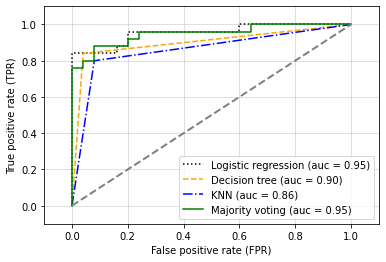

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']

for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    # 陽性クラスのラベルは1であることが前提
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
                    color=clr,
                    linestyle=ls,
                    label='%s (auc = %0.2f)' % (label, roc_auc) )
    
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
                linestyle='--',
                color='gray',
                 linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.show()

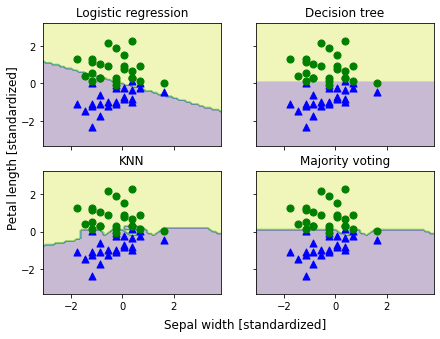

In [55]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
from itertools import product

# 決定領域を描画する最小値、最大値を生成
x_min = X_train_std[:, 0].min() - 1
x_max = X_train_std[:, 0].max() + 1
y_min = X_train_std[:, 1].min() - 1
y_max = X_train_std[:, 1].max() + 1

# グリッドポイントを作成
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                     np.arange(y_min, y_max, 0.1))

# 描画領域を2行2列に分割
f, axarr = plt.subplots(nrows=2, ncols=2,
                                       sharex='col',
                                       sharey='row',
                                       figsize=(7, 5))

# 決定領域のプロット、青谷赤の散布図作成などを実行
# 変数idxは各分類器を描画する行と列の位置を表すタプル
for idx, clf, tt in zip(product([0, 1], [0, 1]), all_clf, clf_labels):
    clf.fit(X_train_std, y_train)
    #  np.c_ : Translates slice objects to concatenation along the second axis.
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx[0], idx[1]].scatter(X_train_std[y_train==0, 0],
                                                      X_train_std[y_train==0, 1],
                                                      c='blue',
                                                      marker='^',
                                                      s=50)
    axarr[idx[0], idx[1]].scatter(X_train_std[y_train==0, 0],
                                                      X_train_std[y_train==1, 1],
                                                      c='green',
                                                      marker='o',
                                                      s=50)
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.text(-3.5, -5.,
                s='Sepal width [standardized]',
                ha='center', va='center', fontsize=12)

plt.text( -12.5, 4.5,
                s='Petal length [standardized]',
                ha='center', va='center', fontsize=12, rotation=90)
plt.show()

In [56]:
mv_clf.get_params()

{'pipeline-1': Pipeline(steps=[('sc', StandardScaler()),
                 ['clf', LogisticRegression(C=0.001, random_state=1)]]),
 'decisiontreeclassifier': DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0),
 'pipeline-2': Pipeline(steps=[('sc', StandardScaler()),
                 ['clf', KNeighborsClassifier(n_neighbors=1)]]),
 'pipeline-1__memory': None,
 'pipeline-1__steps': [('sc', StandardScaler()),
  ['clf', LogisticRegression(C=0.001, random_state=1)]],
 'pipeline-1__verbose': False,
 'pipeline-1__sc': StandardScaler(),
 'pipeline-1__clf': LogisticRegression(C=0.001, random_state=1),
 'pipeline-1__sc__copy': True,
 'pipeline-1__sc__with_mean': True,
 'pipeline-1__sc__with_std': True,
 'pipeline-1__clf__C': 0.001,
 'pipeline-1__clf__class_weight': None,
 'pipeline-1__clf__dual': False,
 'pipeline-1__clf__fit_intercept': True,
 'pipeline-1__clf__intercept_scaling': 1,
 'pipeline-1__clf__l1_ratio': None,
 'pipeline-1__clf__max_iter': 100,
 'pipeline-1__clf__m

In [58]:
# ロジスティック回帰の逆正則化パラメータCと決定木の深さをチューニング

from sklearn.model_selection import GridSearchCV

params = {'decisiontreeclassifier__max_depth': [1, 2],
                 'pipeline-1__clf__C': [0.001, 0.1, 100.0]}
grid = GridSearchCV(estimator=mv_clf,
                                    param_grid=params,
                                    cv=10,
                                    scoring='roc_auc')
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=MajorityVoteClassifier(classifiers=[Pipeline(steps=[('sc',
                                                                            StandardScaler()),
                                                                           ['clf',
                                                                            LogisticRegression(C=0.001,
                                                                                               random_state=1)]]),
                                                           DecisionTreeClassifier(criterion='entropy',
                                                                                  max_depth=1,
                                                                                  random_state=0),
                                                           Pipeline(steps=[('sc',
                                                                            StandardScaler()),
                           

In [59]:
for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
             % (grid.cv_results_['mean_test_score'][r],
                    grid.cv_results_['std_test_score'][r] / 2.0,
                    grid.cv_results_['params'][r]))

0.983 +/- 0.02 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.001}
0.983 +/- 0.02 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.1}
0.967 +/- 0.05 {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 100.0}
0.983 +/- 0.02 {'decisiontreeclassifier__max_depth': 2, 'pipeline-1__clf__C': 0.001}
0.983 +/- 0.02 {'decisiontreeclassifier__max_depth': 2, 'pipeline-1__clf__C': 0.1}
0.967 +/- 0.05 {'decisiontreeclassifier__max_depth': 2, 'pipeline-1__clf__C': 100.0}


In [60]:
print('Best parameters: %s' % grid.best_params_)

Best parameters: {'decisiontreeclassifier__max_depth': 1, 'pipeline-1__clf__C': 0.001}


In [62]:
print('Accuracy: %.2f' % grid.best_score_)

Accuracy: 0.98


## バギング：ブートストラップ標本を使った分類器アンサンブルの構築
+ バギング
 + アンサンブル学習法の1つ。
  + アンサンブルを構成する個々の分類器の学習に同じトレーニングデータセットを使うのではなく、最初のトレーニングデータセットからブートストラップ標本を抽出する。バギングはブートストラップ集約とも呼ばれる。

In [63]:
Image(url="https://miro.medium.com/max/1920/1*DFHUbdz6EyOuMYP4pDnFlw.jpeg")

### バギングの概要
+ トレーニングサンプルからバギングのたびにランダムに復元抽出する。
+ 各ブートストラップ標本が分類器の学習に使用される。
　+ 分類器は剪定されていない決定木が使われることが多い。
 + 復元抽出ゆえに各サブセットには重複が生じうる。
+ 学習したあとは、予測結果を多数決で決める。

※ランダムフォレストはバギングの一形態で、個々の決定木の学習において特徴量をランダムに抽出している。

### バギングを使ってWineデータセットのサンプルを分類する

In [67]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [71]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
                                   'Magnesium', 'Total phenols', 'Flavanoids','Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity',
                                   'Hue', 'OD280/OD315 of diluted wines','Proline']

In [74]:
df_wine = df_wine[df_wine['Class label'] != 1 ]
y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'OD280/OD315 of diluted wines']].values

In [76]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(95, 2)

(24, 2)

(95,)

(24,)

In [77]:
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=None,
                                                     random_state=1)

bag = BaggingClassifier(base_estimator=tree,
                                           n_estimators=500,
                                           max_samples=1.0,
                                           max_features=1.0,
                                           bootstrap=True,
                                           bootstrap_features=False,
                                           n_jobs=1,
                                           random_state=1)

In [78]:
from sklearn.metrics import accuracy_score
tree = tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)

In [79]:
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test) )

Decision tree train/test accuracies 1.000/0.833


In [80]:
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f' % (bag_train, bag_test) )

Bagging train/test accuracies 1.000/0.917


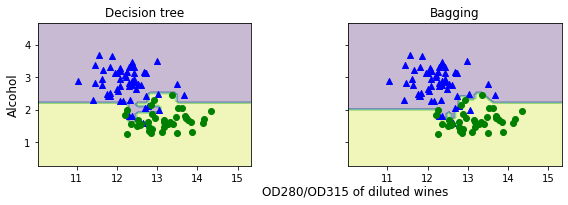

In [81]:
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                     np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(nrows=1, ncols=2,
                                       sharex='col',
                                       sharey='row', figsize=(8, 3))

for idx, clf, tt in zip([0, 1], [tree, bag], ['Decision tree', 'Bagging']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0, 0],
                                    X_train[y_train==0, 1], c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train==1, 0],
                                    X_train[y_train==1, 1], c='green', marker='o')
    axarr[idx].set_title(tt)
    
axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -0.5,
                s='OD280/OD315 of diluted wines',
                ha='center', va='center', fontsize=12)
plt.tight_layout()
plt.show()

バギングはモデルのバリアンスの抑制には効果的であるが、バイアスの抑制には効果が期待できない。データの傾向を把握するには単純すぎる。

## アダブーストによる弱学習器の活用
+ ブースティング
 + アンサンブルを非常に単純な分類器で構成する。
  + 弱学習器は当て推量をわずかに上回る程度。
  + 分類の難しいトレーニングサンプルに焦点を合わせている。
   + 誤分類されたトレーニングサンプルをあとから弱学習器に学習させることで、アンサンブル性能を向上させる。

### ブースティングの仕組み
+ トレーニングデータセットからランダムに非復元抽出されたトレーニングサンプルのサブセットを使用。
+ STEP1.トレーニングデータセットからトレーニングサンプルのランダムなサブセットを非復元抽出し、弱学習器をトレーニングする。
+ STEP2.2つ目のランダムなトレーニングサブセットをトレーニングデータセットから非復元抽出し、以前に誤分類されたサンプルの50%を追加して、2つ目の弱学習器をトレーニングする。
+ STEP3.トレーニングデータセットから、これまでに作った2つの学習器の結果が異なるトレーニングサンプルを洗い出し、3つ目の弱学習器をトレーニングする。
+ STEP4.これまでにトレーニングした3つの弱学習器を多数決により組み合わせる。

※ブースティングではバギングと比べてバイアスとバリアンスが低くなることがあるが、実際にはバリアンスが高い、つまり過学習する傾向がある。

In [82]:
Image(url="http://kamonohashiperry.com/wordpress/wp-content/uploads/2016/04/%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%B3%E3%82%B7%E3%83%A7%E3%83%83%E3%83%88-2016-04-24-18.40.38.png")

+ 学習の手順

+ STEP1.トレーニングサンプルの重みベクトル\\(w\\)を設定し、次の条件が満たされるように全てのサンプルの重みを等しく設定する。Nはサンプルの数。
$$\sum_i^N w_i = 1$$
+ STEP2.全体でm回実行するブースティングのうちj回目のステップで以下の手順を繰り返す。
 + a.重み付けされた弱学習器\\(C_j\\)をトレーニングする。データの1行1行に対して重みが振られている。  
 10個のトレーニングデータなら0.1ずつの重みとなる。
 $$C_j=train(X, y, w)$$
 + b.クラスラベル\\(\hat y\\)を予測する。
 $$\hat y = predict(C_j, X)$$
 + c.重み付けされた誤分類率\\(\epsilon \\)を計算する
 $$\epsilon = w \cdot (\hat y \neq y)$$
 + d.重みの更新に用いる係数\\(\alpha_j\\)を計算する。
 $$\alpha_j = 0.5 \log \frac{1-\epsilon}{\epsilon}$$
 + e.重みを更新する。
 $$w := w \times e^{-\alpha_j \times \hat y \times y} $$
 + f.重みを正規化して合計が1になるようにする。
 $$w := \frac{w}{\sum_i w_i }$$
+ STEP3.入力された特徴行列Xに対する最終予測\\(\hat y\\)を計算する。  
加重平均が０よりも大きければ1、0以下であれば-1をとる。
 $$\hat y = \left (  \sum_{j=1}^m \left ( \alpha_j \times predict(C_j, X) \right ) > 0 \right )$$
 
 ※行単位で合わせにいくから過学習しそうな印象はある。

###  scikit-learnを使ってアダブーストを適用する

In [85]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=1,
                                                     random_state=1)

ada = AdaBoostClassifier(base_estimator=tree,
                                             n_estimators=500,
                                             learning_rate=0.1,
                                             random_state=1)

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)

print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

Decision tree train/test accuracies 0.916/0.875


In [86]:
ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)

print('AdaBoost train/test accuracies %.3f/%.3f' % (ada_train, ada_test))

AdaBoost train/test accuracies 1.000/0.917


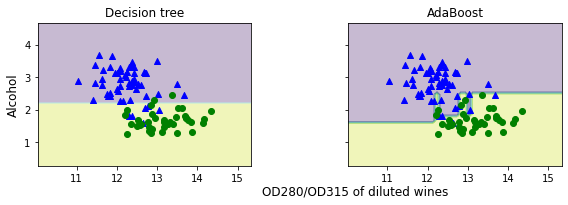

In [87]:
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                     np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(nrows=1, ncols=2,
                                       sharex='col',
                                       sharey='row', figsize=(8, 3))

for idx, clf, tt in zip([0, 1], [tree, ada], ['Decision tree', 'AdaBoost']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0, 0],
                                    X_train[y_train==0, 1], c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train==1, 0],
                                    X_train[y_train==1, 1], c='green', marker='o')
    axarr[idx].set_title(tt)
    
axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -0.5,
                s='OD280/OD315 of diluted wines',
                ha='center', va='center', fontsize=12)
plt.tight_layout()
plt.show()

アダブーストの決定境界は決定株よりもかなり複雑となる。